In [1]:
'''
    A.4 & A.5
    Template for polynomial regression
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np
import matplotlib.pyplot as plt


#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree=1, reg_lambda=1E-8):
        """
        Constructor
        """
        self.regLambda = reg_lambda
        self.degree = degree
        self.theta = None
        self.ScaleMean=None
        self.ScaleSigma=None
        
    def polyfeatures(self, X, degree):
        """
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d numpy array, with each row comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 column numpy array
            degree is a positive integer
        """
        n = len(X)
        #print('lalala',X)
        XX = np.zeros((n,degree))
        for i in range(0,n):
            for j in range(1,self.degree+1):
                XX[i,j-1] = X[i]**j
        #print(XX)
        return XX #n-by-d 

    def fit(self, X, y):
        """
            Trains the model
            Arguments:
                X is a n-by-1 array
                y is an n-by-1 array
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling
                at first
        """
        n = len(X)
        XX = self.polyfeatures(X,self.degree)
                ##standalize
        #if len(X)>1 :   
        self.ScaleMean = np.mean(XX, axis=0)  
        self.ScaleSigma = np.std(XX, axis=0)    
        XX = (XX - self.ScaleMean)/self.ScaleSigma
        #print(XX)

    
        # add 1s column
        XX_ = np.c_[np.ones([n, 1]),XX]
        
        n, d = XX_.shape
        d = d-1  # remove 1 for the extra column of ones we added to get the original num features

        # construct reg matrix
        reg_matrix = self.regLambda * np.eye(d + 1)
        reg_matrix[0, 0] = 0
        
         # analytical solution (X'X + regMatrix)^-1 X' y
        self.theta = np.linalg.pinv(XX_.T.dot(XX_) + reg_matrix).dot(XX_.T).dot(y)


    def predict(self, X):
        """
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        """
    
        n = len(X)

        XX = self.polyfeatures(X, self.degree)
        
        #if len(X)>1 :
        XX = (XX - self.ScaleMean)/self.ScaleSigma

        # add 1s column
        XX_ = np.c_[np.ones([n, 1]),XX]
        
        # predict
        return XX_.dot(self.theta)

#-----------------------------------------------------------------
#  End of Class PolynomialRegression
#-----------------------------------------------------------------



def learningCurve(Xtrain, Ytrain, Xtest, Ytest, reg_lambda, degree):
    """
    Compute learning curve

    Arguments:
        Xtrain -- Training X, n-by-1 matrix
        Ytrain -- Training y, n-by-1 matrix
        Xtest -- Testing X, m-by-1 matrix
        Ytest -- Testing Y, m-by-1 matrix
        regLambda -- regularization factor
        degree -- polynomial degree

    Returns:
        errorTrain -- errorTrain[i] is the training accuracy using
        model trained by Xtrain[0:(i+1)]
        errorTest -- errorTrain[i] is the testing accuracy using
        model trained by Xtrain[0:(i+1)]

    Note:
        errorTrain[0:1] and errorTest[0:1] won't actually matter, since we start displaying the learning curve at n = 2 (or higher)
    """

    n = len(Xtrain)

    errorTrain = np.zeros(n)
    errorTest = np.zeros(n)
    #TODO -- complete rest of method; errorTrain and errorTest are already the correct shape
    from polyreg import PolynomialRegression
    model = PolynomialRegression(degree=degree, reg_lambda=reg_lambda)
    
    for i in range(1,n):
        #fit model
        model.fit(Xtrain[0:(i+1)], Ytrain[0:(i+1)])
        errorTest[i] = ((model.predict(Xtest[0:(i+1)])-Ytest[0:(i+1)])**2).mean()
        errorTrain[i] = ((model.predict(Xtrain[0:(i+1)])-Ytrain[0:(i+1)])**2).mean()

    return errorTrain, errorTest


Populating the interactive namespace from numpy and matplotlib


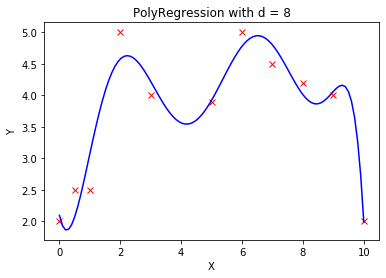

In [2]:
"""
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
"""

import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from polyreg import PolynomialRegression

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, [0]]
    y = allData[:, [1]]

    # regression with degree = d
    d = 8
    model = PolynomialRegression(degree=d, reg_lambda=0)
    model.fit(X, y)

    # output predictions
    xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 16 13:10:52 2020
CSE 546 HW 1 A.6
@author: Leah
"""
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython

def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0


    #show the image
    #img_h = img_w = 28   
    #image_index = 1 # You may select anything up to 60,000
    #print(labels_train[image_index]) # The label is 8
    #plt.imshow(X_train[image_index].reshape((img_h, img_w)), cmap='Greys')
    
    return X_train, labels_train, X_test, labels_test

def train(X,Y,lamda):
    img_h = img_w = 28             # MNIST images are 28x28
    img_size_flat = img_h * img_w  # 28x28=784, the total number of pixels
    W_hat = np.linalg.pinv(X.T.dot(X)+lamda*np.eye(img_size_flat)).dot(X.T).dot(Y)
    return W_hat

def predict(W,XX):
    X_ = W.T.dot(XX.T)
    pre_ = X_.argmax(axis=0)
    return pre_

#-----------------------------------------------------------------
#  Main
#-----------------------------------------------------------------

n_classes = 10                 # Number of classes, one class per digit


#LOAD data
X_train, labels_train, X_test, labels_test = load_dataset()

## transform labels_train(n-by-1) into n-by-k
Y_train = np.zeros((len(labels_train),n_classes))
for i in range(0,len(Y_train)):
    Y_train[i,labels_train[i]] = 1

#get w_hat
W_hat = train(X_train,Y_train,lamda = 0.0001)

#predict
Train_pre = predict(W_hat,X_train)
Test_pre = predict(W_hat,X_test)

##training, test error
train_error = sum(Train_pre != labels_train)/len(labels_train)
test_error = sum(Test_pre != labels_test)/len(labels_test)

print("training error : ",train_error)
print("testing error : ",test_error)

training error :  0.14805
testing error :  0.1466
